In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import math
import plotly.express as px

In [ ]:
data=pd.read_csv("/content/train-chennai-sale.csv")
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
data.shape

(7109, 22)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [ ]:
data.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

#null values in N_bed rooms nd N_bathrooms
#date datatype wrong
#change room type type to  int

In [ ]:
mode_bath=data["N_BATHROOM"].mode()[0]
mode_bed=data["N_BEDROOM"].mode()[0]

In [ ]:
#filling nan with mean values(since it's no.of rooms,better to do so then fill with 0)
data["N_BATHROOM"].fillna(mode_bath,inplace=True)
data["N_BEDROOM"].fillna(mode_bed,inplace=True)

In [ ]:
data.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         0
N_BATHROOM        0
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [ ]:
#changing data types
data["DATE_BUILD"]=pd.to_datetime(data["DATE_BUILD"])
data["DATE_SALE"]=pd.to_datetime(data["DATE_SALE"])
data["N_BEDROOM"]=data["N_BEDROOM"].astype(int)
data["N_BATHROOM"]=data["N_BATHROOM"].astype(int)

In [ ]:
#creating a new coloumn for age of House
data["House_age"]=data["DATE_SALE"].dt.year-data["DATE_BUILD"].dt.year
data["House_age"]

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: House_age, Length: 7109, dtype: int64

In [ ]:
data.sort_values(["House_age"])

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,House_age
6519,P09374,Chrompet,1068,2006-12-31,141,1,1,3,Normal Sale,No,...,Gravel,RL,3.1,4.0,4.7,3.94,254391,145366,9085400,3
476,P06656,Chrompet,760,2009-02-07,24,1,1,2,AbNormal,Yes,...,Paved,RL,3.7,3.8,4.0,3.83,223398,41370,8274000,4
2735,P00144,Chrompet,1254,2014-11-11,27,2,1,4,AdjLand,Yes,...,Paved,RL,4.5,4.8,2.5,4.02,359185,65306,10884400,4
7000,P08440,T Nagar,1901,2007-12-31,83,2,1,5,Normal Sale,Yes,...,Paved,RM,4.9,2.2,2.6,3.19,610994,226294,22629400,4
706,P09026,Chrompet,740,2007-09-05,21,1,1,2,Partial,No,...,No Access,RL,2.5,4.9,4.8,4.15,250101,101893,9263000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3848,P09919,Velachery,1781,2004-10-14,9,2,1,4,AbNormal,No,...,Gravel,C,2.3,2.2,4.3,2.86,501834,92443,13206150,55
6974,P03722,Velachery,1786,2011-01-24,135,2,1,4,AdjLand,No,...,Gravel,C,2.3,4.4,3.8,3.70,406817,244090,13560550,55
5249,P09088,Velachery,1531,2007-11-04,134,2,1,4,AbNormal,No,...,Gravel,RL,4.0,3.8,2.6,3.49,268832,130080,8672000,55
427,P07522,Velachery,1851,2008-10-14,106,3,2,5,AdjLand,Yes,...,Gravel,RM,4.9,4.5,2.5,4.00,442487,95673,11959100,55


In [ ]:
#creating  a newcoloumn for Total Price
data["Total_Price"]=data["REG_FEE"]+data["COMMIS"]+data["SALES_PRICE"]
data["Total_Price"]

0        8124400
1       22781941
2       13672408
3       10063653
4        7717313
          ...   
7104     5668827
7105    11370222
7106     8835792
7107     9051448
7108    10405469
Name: Total_Price, Length: 7109, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7109 non-null   int64         
 6   N_BATHROOM     7109 non-null   int64         
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

In [ ]:
data["AREA"].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [ ]:
#Same place with different spelling,so correct the spelling
mappings={"Karapakam":"Karapakkam","Ana Nagar":"Anna Nagar","Ann Nagar":"Anna Nagar",
          "Adyr":"Adyar","Velchery":"Velachery","TNagar":"T Nagar",
          "Chrompt":"Chrompet","Chrmpet":"Chormpet","Chormpet":"Chrompet",
          "KKNagar":"KK Nagar"}
data["AREA"]=data["AREA"].replace(mappings)
data["AREA"].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar', 'Chormpet'], dtype=object)

In [ ]:
data["SALE_COND"].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [ ]:
#Same sale condition with different spelling,so correct the spelling
mappings={"Ab Normal":"AbNormal","Partiall":"Partial","PartiaLl":"Partial",
           "Adj Land":"AdjLand"}
data["SALE_COND"]=data["SALE_COND"].replace(mappings)
data["SALE_COND"].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [ ]:
data["PARK_FACIL"].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [ ]:
#Same park facilities with different spelling,so correct the spelling
mappings={"Noo":"No"}
data["PARK_FACIL"]=data["PARK_FACIL"].replace(mappings)
data["PARK_FACIL"].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
data["UTILITY_AVAIL"].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [ ]:
#Same utility available with different spelling,so correct the spelling
mappings={"All Pub":"AllPub","NoSeWa":"NoSewr","NoSewr ":"NoSewr"}
data["UTILITY_AVAIL"]=data["UTILITY_AVAIL"].replace(mappings)
data["UTILITY_AVAIL"].unique()

array(['AllPub', 'ELO', 'NoSewr'], dtype=object)

In [ ]:
data["STREET"].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [ ]:
#Same street with different spelling,so correct the spelling
mappings={"Pavd":"Paved","No Access":"NoAccess"}
data["STREET"]=data["STREET"].replace(mappings)
data["STREET"].unique()

array(['Paved', 'Gravel', 'NoAccess'], dtype=object)

In [ ]:
data["BUILDTYPE"].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [ ]:
#Same build type with different spelling,so correct the spelling
mappings={"Comercial":"Commercial","Other":"Others"}
data["BUILDTYPE"]=data["BUILDTYPE"].replace(mappings)
data["BUILDTYPE"].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [ ]:
data["MZZONE"].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


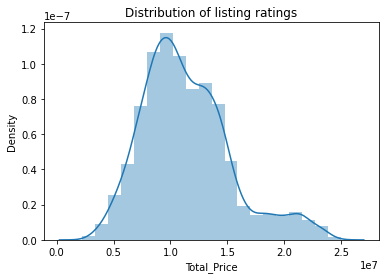

In [ ]:
#plotting
# Visualize the distribution of the rating column
sns.distplot(data['Total_Price'], bins = 20)
plt.title('Distribution of listing ratings')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


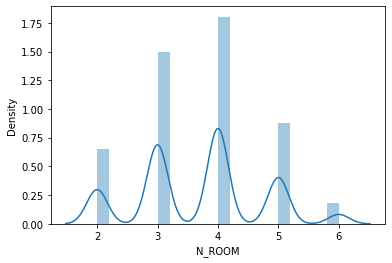

In [ ]:
sns.distplot(data['N_ROOM'], bins = 20)
plt.show()

In [ ]:
A=data['AREA'].groupby(data['AREA']).count()
B=data['AREA'].groupby(data['BUILDTYPE']).count()
C=data['AREA'].groupby(data['UTILITY_AVAIL']).count()
D=data['AREA'].groupby(data['STREET']).count()
E=data['AREA'].groupby(data['MZZONE']).count()
F=data['AREA'].groupby(data['PARK_FACIL']).count()

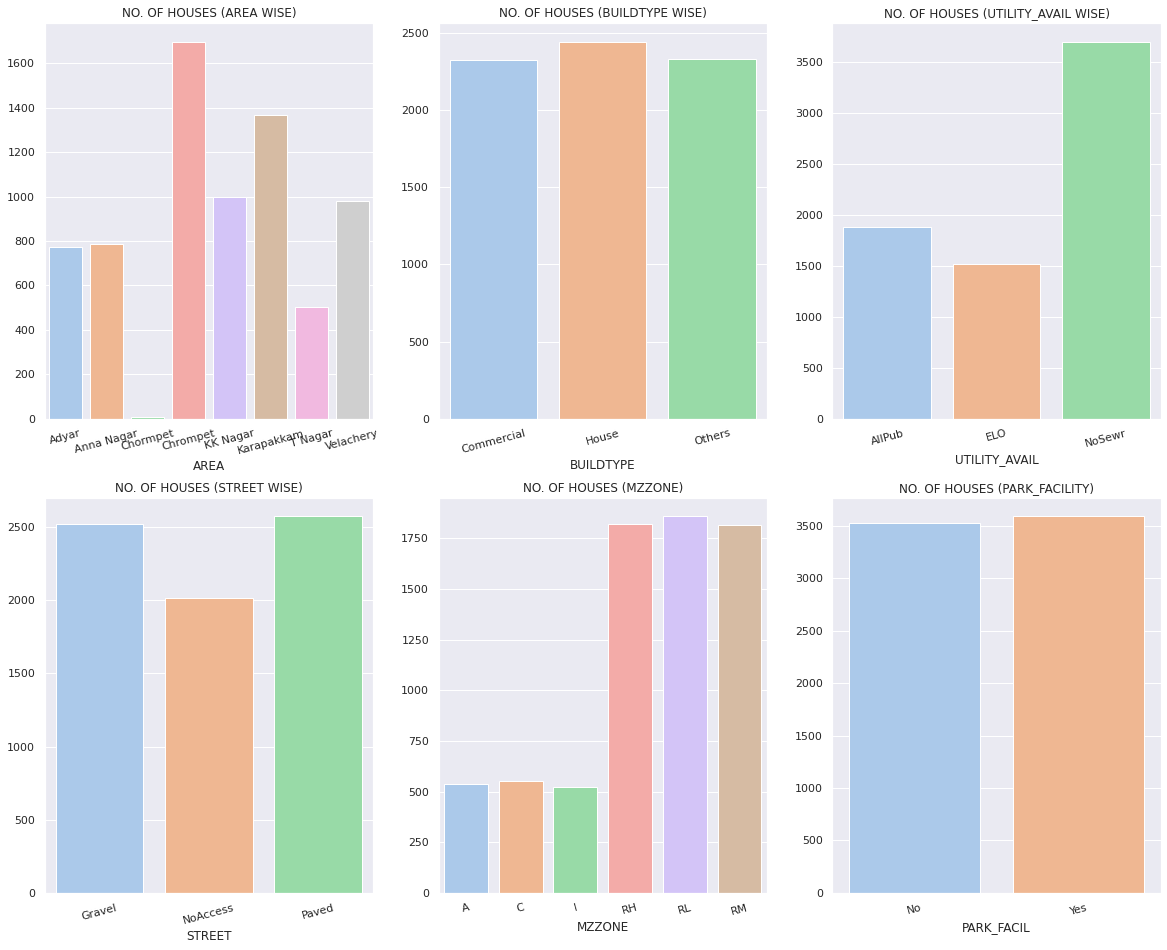

In [ ]:
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(20,16))
plt.subplot(231)
sns.barplot(x=A.index,y=A.values,data=data)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (AREA WISE)')
plt.subplot(232)
sns.barplot(x=B.index,y=B.values,data=data)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (BUILDTYPE WISE)')
plt.subplot(233)
sns.barplot(x=C.index,y=C.values,data=data)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (UTILITY_AVAIL WISE)')
plt.subplot(234)
sns.barplot(x=D.index,y=D.values,data=data)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (STREET WISE)')
plt.subplot(235)
sns.barplot(x=E.index,y=E.values,data=data)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (MZZONE)')
plt.subplot(236)
sns.barplot(x=F.index,y=F.values,data=data)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (PARK_FACILITY)')
plt.show()

In [ ]:
#Plotting
fig1=px.histogram(data,x='AREA',color='AREA',title="<b>AREA WISE DISTRIBUTION OF DATA<b>"+" (no of area per data)")
fig1


In [ ]:
import plotly.express as px
fig1=px.histogram(data,x='INT_SQFT',color='INT_SQFT',title="<b>AREA WISE DISTRIBUTION OF DATA<b>"+" (no of area per data)")
fig1

In [ ]:
import plotly.express as px
fig1=px.histogram(data,x='DIST_MAINROAD',color='DIST_MAINROAD',title="<b>Distribution from the main road<b>"+" (no of area per data)")
fig1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



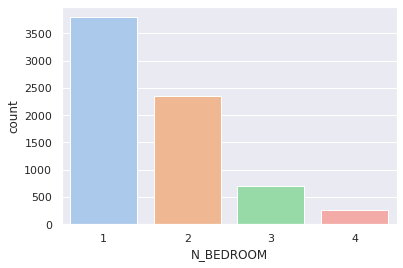

In [ ]:
import seaborn as sns
sns.countplot(data['N_BEDROOM'])

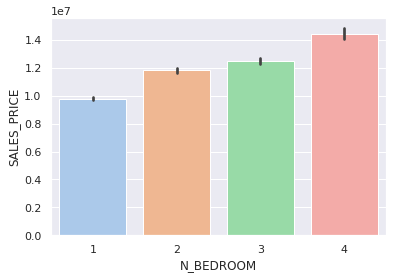

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x = 'N_BEDROOM',y = 'SALES_PRICE',data = data)
plt.show()



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



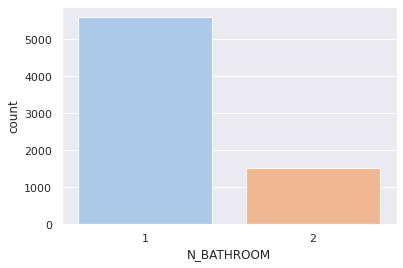

In [ ]:
import seaborn as sns
sns.countplot(data['N_BATHROOM'])

In [ ]:
import plotly.express as px
fig1=px.histogram(data,x='N_ROOM',color='N_ROOM',title="<b>Distribution of total no of rooms<b>"+" (count of total rooms)")
fig1

In [ ]:
value=data['SALE_COND'].value_counts()
name=data['SALE_COND'].unique()

In [ ]:
fig=px.pie(data,values=value,names=name,color=value,title="<b>distribution of condition of sale")
fig

In [ ]:
value=data['PARK_FACIL'].value_counts()
name=data['PARK_FACIL'].unique()

In [ ]:
fig=px.pie(data,values=value,names=name,color=value,title="<b>distribution of availability of parking")
fig

In [ ]:
fig=px.histogram(data,x='BUILDTYPE',color='BUILDTYPE',title="<b>Distribution of total no of bedrooms<br></b>"+" (count of no of bedrooms)")
fig

In [ ]:
fig=px.histogram(data,x="UTILITY_AVAIL",color="UTILITY_AVAIL",title="<b> Distribution of available utilities")
fig

In [ ]:
fig=px.histogram(data,x="STREET",color="STREET",title="<b> Distribution of type of streets")
fig

In [ ]:
fig12=px.scatter(data,x="Total_Price",color="Total_Price",title="<b> Distribution of total price </b>"+"(reg fee+sale price+commision+")
fig12

In [ ]:
fig= px.histogram(data,x="House_age",color="House_age",title="<b> Distribution of age of house </b>")
fig

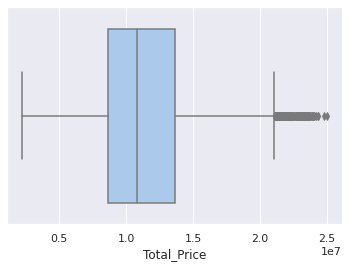

In [ ]:
#check for outlier in Total Price coloumn
outlier=sns.boxplot(x=data["Total_Price"])

In [ ]:
#correlation Matrix
corrmatrix=data.corr()
corrmatrix

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,House_age,Total_Price
INT_SQFT,1.000000,0.002022,0.786263,0.515290,0.951279,0.019850,-0.008337,0.008865,0.014025,0.657544,0.571076,0.612125,-0.012610,0.620010
DIST_MAINROAD,0.002022,1.000000,-0.002723,0.001850,0.002301,0.002237,-0.029468,0.001554,-0.017313,0.011600,0.010994,0.018783,-0.003559,0.018584
N_BEDROOM,0.786263,-0.002723,1.000000,0.755207,0.840209,0.014948,-0.007534,0.015752,0.014282,0.455380,0.430446,0.330987,-0.045873,0.341300
N_BATHROOM,0.515290,0.001850,0.755207,1.000000,0.568541,0.013376,-0.012043,0.013191,0.007989,0.260244,0.256726,0.108834,-0.020403,0.118533
N_ROOM,0.951279,0.002301,0.840209,0.568541,1.000000,0.016524,-0.007545,0.015072,0.015459,0.630932,0.533343,0.602760,-0.033316,0.609345
QS_ROOMS,0.019850,0.002237,0.014948,0.013376,0.016524,1.000000,0.008828,0.007789,0.517741,0.019739,0.009377,0.021967,0.019718,0.021888
QS_BATHROOM,-0.008337,-0.029468,-0.007534,-0.012043,-0.007545,0.008828,1.000000,-0.011745,0.551125,-0.006719,-0.000471,-0.011377,0.021700,-0.011122
QS_BEDROOM,0.008865,0.001554,0.015752,0.013191,0.015072,0.007789,-0.011745,1.000000,0.630447,0.021526,0.020118,0.018804,-0.017971,0.019146
QS_OVERALL,0.014025,-0.017313,0.014282,0.007989,0.015459,0.517741,0.551125,0.630447,1.000000,0.022482,0.017004,0.020556,0.012562,0.020792
REG_FEE,0.657544,0.011600,0.455380,0.260244,0.630932,0.019739,-0.006719,0.021526,0.022482,1.000000,0.659903,0.878148,-0.116322,0.888335


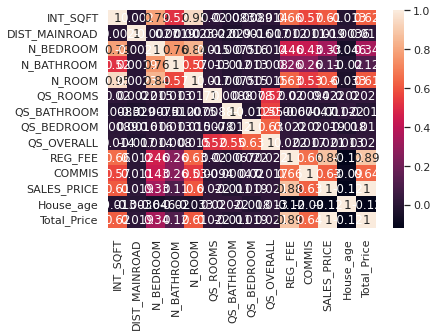

In [ ]:
heat=sns.heatmap(corrmatrix,annot=True)
heat

Feature Vs the Target Coloumn

In [ ]:
#Creating a Dataframe Vs Average Sale Price
x=pd.DataFrame(data.groupby("AREA")["Total_Price"].mean())
y=data["AREA"].unique()
y=sorted(y)

data1={'Area':y,'Average_price':x['Total_Price']}
temp=pd.DataFrame(data1)
temp.sort_values('Average_price',inplace=True)
temp

,Area,Average_price
AREA,,
Karapakkam,Karapakkam,7.755477e+06
Adyar,Adyar,9.580581e+06
Chormpet,Chormpet,9.787022e+06
Chrompet,Chrompet,1.041020e+07
Velachery,Velachery,1.158841e+07
KK Nagar,KK Nagar,1.341933e+07
Anna Nagar,Anna Nagar,1.584423e+07
T Nagar,T Nagar,1.632265e+07


In [ ]:
fig=px.bar(temp,x="Area",y="Average_price",color="Area",title="<b>AREA vs Average_price<br>")
fig

In [ ]:
#Interpretation
fig=px.scatter(data,x="INT_SQFT",y="Total_Price",color="INT_SQFT",title="<b> Total Price Vs Sqrt")
fig

In [ ]:
#Checking Values to crosscheck with graph
y=data[(data["INT_SQFT"])>2000 & (data["INT_SQFT"]<2500)]
y["Total_Price"].max()


24969043

In [ ]:
fig3=px.scatter(data,x="DIST_MAINROAD",y="Total_Price",color="DIST_MAINROAD",title="<b> Price Vs distance from Main Road")
fig3

In [ ]:
#Creating a dataframe with no of Bedroom and average sales price 
import pandas as pd
x3=pd.DataFrame(data.groupby("N_BEDROOM")["Total_Price"].mean())
y3=data["N_BEDROOM"].unique()
y3=sorted(y3)

data3={'N_BEDROOM':y3,"Average_Price":x3['Total_Price']}
temp1=pd.DataFrame(data3)
temp1

,N_BEDROOM,Average_Price
N_BEDROOM,,
1,1,1.022734e+07
2,2,1.239016e+07
3,3,1.313775e+07
4,4,1.527924e+07


In [ ]:
fig4=px.bar(temp1,x="N_BEDROOM",y="Average_Price",color="N_BEDROOM",title="<b> no of bedrooms Vs Average Price<br>")
fig4

In [ ]:
a=[data.loc[(data.DIST_MAINROAD>i)&(data.DIST_MAINROAD<(i+25)),"Total_Price"].mean() for i in range(0,200,25)]
a  

[11413199.473105134,
 11361353.930365296,
 11368051.05399061,
 11217404.042505592,
 11344771.67157418,
 11607460.952996476,
 11588614.209273184,
 11519452.342581423]

Text(0.5, 1.0, 'Dist mainroad Vs Price')

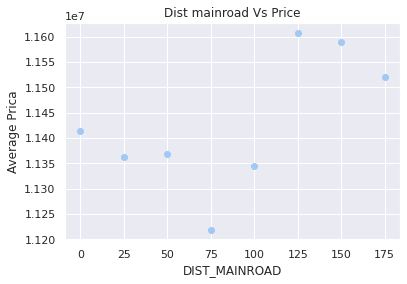

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x = list(range(0,200,25)),y=a)
plt.xlabel("DIST_MAINROAD")
plt.ylabel("Average Prica")
plt.title("Dist mainroad Vs Price")


In [ ]:
#Creating a dataframe with no of Bathroom and average sales price 
import pandas as pd
x3=pd.DataFrame(data.groupby("N_BATHROOM")["Total_Price"].mean())
y3=data["N_BATHROOM"].unique()
y3=sorted(y3)

data4={'N_BATHROOM':y3,"Average_Price":x3['Total_Price']}
temp2=pd.DataFrame(data4)
temp2

,N_BATHROOM,Average_Price
N_BATHROOM,,
1,1,1.116952e+07
2,2,1.231133e+07


In [ ]:
fig5=px.bar(temp2,x="N_BATHROOM",y="Average_Price",color="N_BATHROOM",title="<b> no of bathrooms Vs Average Price<br>")
fig5

In [ ]:
#Creating a dataframe with no.of rooms and average sale price
import pandas as pd
x4=pd.DataFrame(data.groupby("N_ROOM")["Total_Price"].mean())
y4=data["N_ROOM"].unique()
y4=sorted(y4)

data5={'N_ROOM':y4,"Average_Price":x4['Total_Price']}
temp3=pd.DataFrame(data5)
temp3

,N_ROOM,Average_Price
N_ROOM,,
2,2,7.311581e+06
3,3,9.705458e+06
4,4,1.225463e+07
5,5,1.483657e+07
6,6,1.527924e+07


In [ ]:
fig6=px.bar(temp3,x="N_ROOM",y="Average_Price",color="N_ROOM",title="<b> Total Rooms Vs Average Price<br>")
fig6

In [ ]:
#Creating a dataframe with sales condition and average sale price
import pandas as pd
x5=pd.DataFrame(data.groupby("SALE_COND")["Total_Price"].mean())
y5=data["SALE_COND"].unique()
y5=sorted(y5)

data6={'SALE_COND':y5,"Average_Price":x5['Total_Price']}
temp4=pd.DataFrame(data6)
temp4.sort_values("Average_Price",inplace=True)
temp4

,SALE_COND,Average_Price
SALE_COND,,
Partial,Partial,1.111605e+07
Family,Family,1.125081e+07
AbNormal,AbNormal,1.143618e+07
Normal Sale,Normal Sale,1.151787e+07
AdjLand,AdjLand,1.173969e+07


In [ ]:
fig7=px.bar(temp4,x="SALE_COND",y="Average_Price",color="SALE_COND",title="<b> Sales Condition  Vs Average Price<br>")
fig7

In [ ]:
#Creating a dataframe with Parking Facilities and average sale price
import pandas as pd
x6=pd.DataFrame(data.groupby("PARK_FACIL")["Total_Price"].mean())
y6=data["PARK_FACIL"].unique()
y6=sorted(y6)

data7={'PARK_FACIL':y6,"Average_Price":x6['Total_Price']}
new=pd.DataFrame(data7)
#new
fig8=px.bar(new,x='PARK_FACIL',y="Average_Price",color='PARK_FACIL',title="<b> Park Facilities  Vs Average Price<br>")
fig8

In [ ]:
#Creating a dataframe with Building Type and average sale price
import pandas as pd
x7=pd.DataFrame(data.groupby("BUILDTYPE")["Total_Price"].mean())
y7=data["BUILDTYPE"].unique()
y7=sorted(y7)

data8={"BUILDTYPE":y7,"Average_Price":x7['Total_Price']}
new1=pd.DataFrame(data8)
new1.sort_values("Average_Price",inplace=True)
fig9=px.bar(new1,x="BUILDTYPE",y="Average_Price",color="BUILDTYPE",title="<b> Building Type  Vs Average Price<br>")
fig9

In [ ]:
#Creating a dataframe with Utility Available and average sale price
import pandas as pd
x8=pd.DataFrame(data.groupby("UTILITY_AVAIL")["Total_Price"].mean())
y8=data["UTILITY_AVAIL"].unique()
y8=sorted(y8)

data9={"UTILITY_AVAIL":y8,"Average_Price":x8['Total_Price']}
new2=pd.DataFrame(data9)
new2.sort_values("Average_Price",inplace=True)
fig10=px.bar(new2,x="UTILITY_AVAIL",y="Average_Price",color="UTILITY_AVAIL",title="<b> Utility Available  Vs Average Price<br>")
fig10

In [ ]:
#Creating a dataframe with Street and average sale price
import pandas as pd
x9=pd.DataFrame(data.groupby("STREET")["Total_Price"].mean())
y9=data["STREET"].unique()
y9=sorted(y9)

data10={"STREET":y9,"Average_Price":x9['Total_Price']}
new3=pd.DataFrame(data10)
new3.sort_values("Average_Price",inplace=True)
fig11=px.bar(new3,x="STREET",y="Average_Price",color="STREET",title="<b> Street  Vs Average Price<br>")
fig11

In [ ]:
#Creating a dataframe with House Age and average sale price
import pandas as pd
x10=pd.DataFrame(data.groupby("House_age")["Total_Price"].mean())
y10=data["House_age"].unique()
y10=sorted(y10)

data11={"House_age":y10,"Average_Price":x10['Total_Price']}
new4=pd.DataFrame(data11)
new4.sort_values("Average_Price",inplace=True)
fig12=px.bar(new4,x="House_age",y="Average_Price",color="House_age",title="<b> House Age   Vs Average Price<br>")
fig12

ML Model Build

In [ ]:
datanew=data
datanew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7109 non-null   int64         
 6   N_BATHROOM     7109 non-null   int64         
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

In [ ]:
#Encoding the catagorical data
from sklearn import preprocessing
label_encode=preprocessing.LabelEncoder()
#Label starts from 0 in a alphapetical order
datanew["AREA"]=label_encode.fit_transform(datanew["AREA"])
datanew["SALE_COND"]=label_encode.fit_transform(datanew["SALE_COND"])
datanew["PARK_FACIL"]=label_encode.fit_transform(datanew["PARK_FACIL"])
datanew["BUILDTYPE"]=label_encode.fit_transform(datanew["BUILDTYPE"])
datanew["STREET"]=label_encode.fit_transform(datanew["STREET"])
datanew["MZZONE"]=label_encode.fit_transform(datanew["MZZONE"])
datanew["UTILITY_AVAIL"]=label_encode.fit_transform(datanew["UTILITY_AVAIL"])


Linear Regression

In [ ]:
#setting features and Target (x and y)
x=datanew[["AREA","INT_SQFT","DIST_MAINROAD","N_BEDROOM","N_BATHROOM","N_ROOM","SALE_COND","PARK_FACIL","BUILDTYPE","UTILITY_AVAIL","STREET","MZZONE","House_age"]]
y=datanew["Total_Price"].values

In [ ]:
#Splitting training and testing the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

#predicting

ypred = lr.predict(x_test)
lr.score(x_test,y_test)*100

78.75991955800802

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#fitting the model
decisiontree = DecisionTreeRegressor()
decisiontree.fit(x_train,y_train)

#predicting
decisiontree_score = decisiontree.score(x_test,y_test)*100
print("Decision Tree score is",decisiontree_score)

Decision Tree score is 95.63088594988315


In [ ]:
from sklearn.ensemble import RandomForestRegressor

#Fitting the model
randomforest = RandomForestRegressor(max_depth=16,n_estimators=180,random_state=15)
randomforest.fit(x_train,y_train)

ypred = randomforest.predict(x_test)
randomforestscore = randomforest.score(x_test,y_test)*100
print("Random Forest Square is :",randomforestscore)

Random Forest Square is : 98.11106736751452


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

#fitting the model
GradientBoosting = GradientBoostingRegressor()
GradientBoosting.fit(x_train,y_train)

#predicting the model
GradientBoosting_score = GradientBoosting.score(x_test,y_test)*100
GradientBoosting_score

98.46040090521062

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

#fitting the model
adaboost = AdaBoostRegressor(random_state=15,n_estimators=130)
adaboost.fit(x_train,y_train)

#predicting the model
adaboostscore = adaboost.score(x_test,y_test)*100
adaboostscore

88.81059138627442

Model Scores

In [ ]:
print("RandomForest Regression score is ",randomforestscore)
print("Adaboost Regression score is ",adaboostscore)
print("Gradient Boost Regression score is ",GradientBoosting_score)
print("Adaboost Regression score is ",adaboostscore)
print("Decision Tree score is ",decisiontree_score)

RandomForest Regression score is  98.11106736751452
Adaboost Regression score is  88.81059138627442
Gradient Boost Regression score is  98.46040090521062
Adaboost Regression score is  88.81059138627442
Decision Tree score is  95.63088594988315


Gradient Boost Regression gives the better Accuracy

In [ ]:
feature_scores = pd.Series(randomforest.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_scores=feature_scores*100
feature_scores

INT_SQFT         40.877370
BUILDTYPE        31.589581
MZZONE           11.322768
AREA              7.604436
N_BEDROOM         3.250577
PARK_FACIL        1.429075
N_ROOM            0.936052
N_BATHROOM        0.910179
STREET            0.735552
House_age         0.599452
DIST_MAINROAD     0.369030
SALE_COND         0.255495
UTILITY_AVAIL     0.120435
dtype: float64

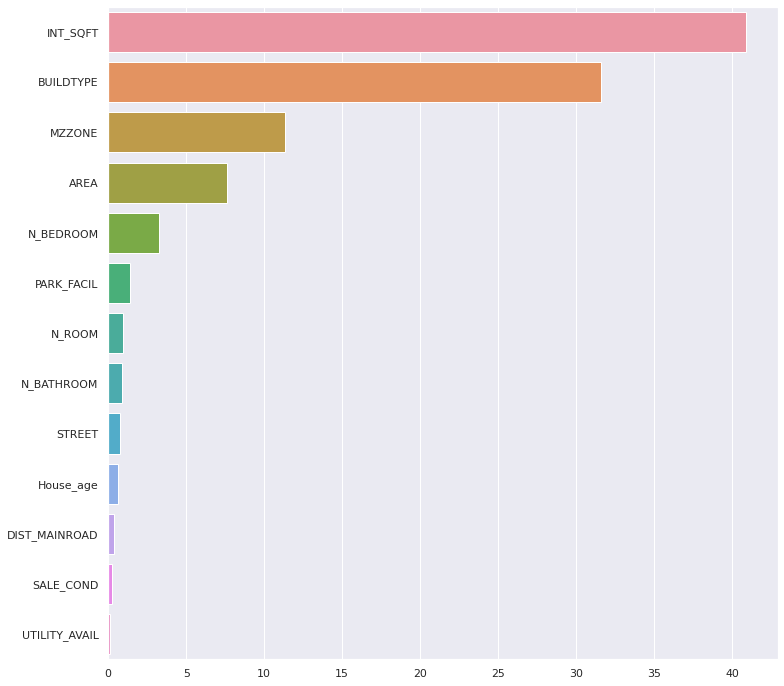

In [ ]:
plt.figure(figsize=(12,12))
sns.barplot(x=feature_scores,y=feature_scores.index)
plt.show()

Finalize the Model

In [ ]:
print("Gradient Boost Regression score is ",GradientBoosting_score)

Gradient Boost Regression score is  98.46040090521062


In [ ]:
import pickle

#Writing Pickle File
with open('House_pkl','wb') as f:
    pickle.dump(GradientBoosting,f)